#Lecture 2

#Removing HTML Tags

In [ ]:
sample_text = '<h2>HTML Element</h2><p>The HTML <code class="w3-codespan">&lt;sup&gt;</code> element defines superscript text.'

In [ ]:
sample_text

'<h2>HTML Element</h2><p>The HTML <code class="w3-codespan">&lt;sup&gt;</code> element defines superscript text.'

In [ ]:
import re
def striphtml(data):
  p = re.compile(r'<.*?>')
  return p.sub(' ', data)

In [ ]:
striphtml(sample_text)

' HTML Element  The HTML  &lt;sup&gt;  element defines superscript text.'

#Unicode Normalization
It converts emojis into machine understandable texts.

In [ ]:
emoji_text = 'how the heck are you supposed to use the 🙃 emoji?'

In [ ]:
emoji_text

'how the heck are you supposed to use the 🙃 emoji?'

In [ ]:
emoji_text.encode('utf-8')

b'how the heck are you supposed to use the \xf0\x9f\x99\x83 emoji?'

#Spell Checking

In [ ]:
incorrect_text = 'ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.'

In [ ]:
incorrect_text

'ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.'

In [ ]:
from textblob import TextBlob
textBlb = TextBlob(incorrect_text)
textBlb.correct()

TextBlob("certain conditions during several generations are modified in the same manner.")

#Tokenization

In [ ]:
dummy = "A paragraph is a collection of words strung together to make a longer unit than a sentence. Several sentences often make to a paragraph. There are normally three to eight sentences in a paragraph. Paragraphs can start with a five-space indentation or by skipping a line and then starting over. This makes it simpler to tell when one paragraph ends and the next starts. A topic phrase appears in most ordered types of writing, such as essays. This paragraph's topic sentence informs the reader about the topic of the paragraph. In most essays, numerous paragraphs make statements to support a thesis statement, which is the essay's fundamental point. Paragraphs may signal when the writer changes topics. Each paragraph may have a number of sentences, depending on the topic."

In [ ]:
dummy

"A paragraph is a collection of words strung together to make a longer unit than a sentence. Several sentences often make to a paragraph. There are normally three to eight sentences in a paragraph. Paragraphs can start with a five-space indentation or by skipping a line and then starting over. This makes it simpler to tell when one paragraph ends and the next starts. A topic phrase appears in most ordered types of writing, such as essays. This paragraph's topic sentence informs the reader about the topic of the paragraph. In most essays, numerous paragraphs make statements to support a thesis statement, which is the essay's fundamental point. Paragraphs may signal when the writer changes topics. Each paragraph may have a number of sentences, depending on the topic."

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
sents = sent_tokenize(dummy)
sents

['A paragraph is a collection of words strung together to make a longer unit than a sentence.',
 'Several sentences often make to a paragraph.',
 'There are normally three to eight sentences in a paragraph.',
 'Paragraphs can start with a five-space indentation or by skipping a line and then starting over.',
 'This makes it simpler to tell when one paragraph ends and the next starts.',
 'A topic phrase appears in most ordered types of writing, such as essays.',
 "This paragraph's topic sentence informs the reader about the topic of the paragraph.",
 "In most essays, numerous paragraphs make statements to support a thesis statement, which is the essay's fundamental point.",
 'Paragraphs may signal when the writer changes topics.',
 'Each paragraph may have a number of sentences, depending on the topic.']

In [ ]:
for sent in sents:
  print(word_tokenize(sent))

['A', 'paragraph', 'is', 'a', 'collection', 'of', 'words', 'strung', 'together', 'to', 'make', 'a', 'longer', 'unit', 'than', 'a', 'sentence', '.']
['Several', 'sentences', 'often', 'make', 'to', 'a', 'paragraph', '.']
['There', 'are', 'normally', 'three', 'to', 'eight', 'sentences', 'in', 'a', 'paragraph', '.']
['Paragraphs', 'can', 'start', 'with', 'a', 'five-space', 'indentation', 'or', 'by', 'skipping', 'a', 'line', 'and', 'then', 'starting', 'over', '.']
['This', 'makes', 'it', 'simpler', 'to', 'tell', 'when', 'one', 'paragraph', 'ends', 'and', 'the', 'next', 'starts', '.']
['A', 'topic', 'phrase', 'appears', 'in', 'most', 'ordered', 'types', 'of', 'writing', ',', 'such', 'as', 'essays', '.']
['This', 'paragraph', "'s", 'topic', 'sentence', 'informs', 'the', 'reader', 'about', 'the', 'topic', 'of', 'the', 'paragraph', '.']
['In', 'most', 'essays', ',', 'numerous', 'paragraphs', 'make', 'statements', 'to', 'support', 'a', 'thesis', 'statement', ',', 'which', 'is', 'the', 'essay', "

#Lecture 3 - Text Preprocessing

#Lowercasing

Since Python is a case sensitive language...when we tokenize the words in paragraph like "Mango" and "mango..here these 2 words are same but after tokenization Pyhon treats both words different just because capital m and small m...hence to reduce this complexity we lowercase whole text.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [ ]:
df['review'][3].lower()

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [ ]:
df['review'].str.lower()

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
df['review'] = df['review'].str.lower()

In [ ]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
df['review'][3]

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [ ]:
df.shape

(50000, 2)

#Remove HTML Tags

In [ ]:
import re
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'', text)

In [ ]:
text = "<html><body><p> Movie 1</p><p> Actor - Aamir Khan</p><p> Click here to <a href='http://google.com'>download</a></p></body></html>"

In [ ]:
remove_html_tags(text)

' Movie 1 Actor - Aamir Khan Click here to download'

In [ ]:
df['review'].apply(remove_html_tags)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
df['review'] = df['review'].apply(remove_html_tags)

#Reassign

In [ ]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
df['review'][3]

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

#Remove URLs

In [ ]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [ ]:
text1 = 'Check out my notebook https://www.kaggle.com/campusx/notebook8223fc1abb'
text2 = 'Check out my notebook http://www.kaggle.com/campusx/notebook8223fc1abb'
text3 = 'Google search here www.google.com'
text4 = 'For notebook click https://www.kaggle.com/campusx/notebook8223fc1abb to search check www.google.com'

In [ ]:
text1

'Check out my notebook https://www.kaggle.com/campusx/notebook8223fc1abb'

In [ ]:
remove_url(text1)

'Check out my notebook '

In [ ]:
remove_url(text2)

'Check out my notebook '

In [ ]:
remove_url(text3)

'Google search here '

In [ ]:
remove_url(text4)

'For notebook click  to search check '

#Remove Punctuation

In [ ]:
import string,time

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude = string.punctuation

#Here exclude is list of punctuation marks.

In [ ]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text

In [ ]:
text = 'string. With. Punctuation?'

In [ ]:
text

'string. With. Punctuation?'

In [ ]:
print(remove_punc(text))

string With Punctuation


In [ ]:
start = time.time()
print(remove_punc(text))
time1 = time.time() - start
print(time1)

#This will calculate the time to complete this process of removing punctuation.

string With Punctuation
0.0024716854095458984


In [ ]:
#For one sentence it is taking that much time...suppose if we have 50000 sentences then it will take the time printed below:
#Here time is in seconds.

start = time.time()
print(remove_punc(text))
time1 = time.time() - start
print(time1*50000)

string With Punctuation
41.6874885559082


In [ ]:
#Above process is too slow...so we will use other method to remove punctuation which is a standard technique.

In [ ]:
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

In [ ]:
start = time.time()
print(remove_punc1(text))
time2 = time.time() - start
print(time2)

string With Punctuation
0.0001819133758544922


In [ ]:
start = time.time()
remove_punc1(text)
time2 = time.time() - start
print(time2*50000)

4.112720489501953


In [ ]:
time1/time2

10.13623188405797

In [ ]:
#Above division result shows that our second technique is approx 4.5 times faster than first technique.
#So we will use our second method always to remove punctuation...specially when we have large dataset.

In [ ]:
#Kaggle: twitter-sentiment-analysis-hatred-speech dataset

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.sample()

,id,label,tweet
777,778,0,i am thankful for freezers. #thankful #positiv...


In [ ]:
df.sample(5)

,id,label,tweet
8342,8343,0,bitch i'm crying ð­
6434,6435,0,"surprise (lagi).. hahaha... happy me, lucky me..."
24343,24344,0,with bffs... #coffee #talk #cake #yum #quali...
264,265,1,#stereotyping #prejudice offer no #hope or so...
2707,2708,0,education is not preparation for life; educati...


In [ ]:
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [ ]:
import string
exclude = string.punctuation

In [ ]:
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

In [ ]:
df['tweet'].apply(remove_punc1)

0         user when a father is dysfunctional and is so...
1        user user thanks for lyft credit i cant use ca...
2                                      bihday your majesty
3        model   i love u take with u all the time in u...
4                     factsguide society now    motivation
                               ...                        
31957    ate user isz that youuuðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    user sikh temple vandalised in in calgary wso ...
31961                      thank you user for you follow  
Name: tweet, Length: 31962, dtype: object

In [ ]:
df['tweet'] = df['tweet'].apply(remove_punc1)

#Reassigning

In [ ]:
df

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate user isz that youuuðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,user sikh temple vandalised in in calgary wso ...


#Chat Word Treatment

In [ ]:
chat_words = {"AFAIK" : "As Far As I Know",
"AFK" : "Away From Keyboard",
"ASAP" : "As Soon As Possible",
"ATK" : "At The Keyboard",
"ATM" : "At The Moment",
"A3" : "Anytime, Anywhere, Anyplace",
"BAK" : "Back At Keyboard",
"BBL" : "Be Back Later",
"BBS" : "Be Back Soon",
"BFN" : "Bye For Now",
"B4N" : "Bye For Now",
"BRB" : "Be Right Back",
"BRT" : "Be Right There",
"BTW" : "By The Way",
"B4"  : "Before",
"B4N" : "Bye For Now",
"CU" : "See You",
"CUL8R" : "See You Later",
"CYA" : "See You",
"FAQ" : "Frequently Asked Questions",
"FC" : "Fingers Crossed",
"FWIW" : "For What It's Worth",
"FYI" : "For Your Information",
"GAL" : "Get A Life",
"GG" : "Good Game",
"GN" : "Good Night",
"GMTA" : "Great Minds Think Alike",
"GR8" : "Great!",
"G9" : "Genius",
"IC" : "I See",
"ICQ" : "I Seek you (also a chat program)",
"ILU" : "ILU: I Love You",
"IMHO" : "In My Honest/Humble Opinion",
"IMO" : "In My Opinion",
"IOW" : "In Other Words",
"IRL" : "In Real Life",
"KISS" : "Keep It Simple, Stupid",
"LDR" : "Long Distance Relationship",
"LMAO" : "Laugh My A.. Off",
"LOL" : "Laughing Out Loud",
"LTNS" : "Long Time No See",
"L8R" : "Later",
"MTE" : "My Thoughts Exactly",
"M8" : "Mate",
"NRN" : "No Reply Necessary",
"OIC" : "Oh I See",
"PITA" : "Pain In The A..",
"PRT" : "Party",
"PRW" : "Parents Are Watching",
"QPSA?" :	"Que Pasa?",
"ROFL" : "Rolling On The Floor Laughing",
"ROFLOL" : "Rolling On The Floor Laughing Out Loud",
"ROTFLMAO" : "Rolling On The Floor Laughing My A.. Off",
"SK8" : "Skate",
"STATS" : "Your sex and age",
"ASL" : "Age, Sex, Location",
"THX" : "Thank You",
"TTFN" : "Ta-Ta For Now!",
"TTYL" : "Talk To You Later",
"U" : "You",
"U2" : "You Too",
"U4E" : "Yours For Ever",
"WB"  : "Welcome Back",
"WTF" : "What The F...",
"WTG" : "Way To Go!",
"WUF" : "Where Are You From?",
"W8" : "Wait...",
"7K" : "Sick:-D Laugher"}

In [ ]:
chat_words

{'7K': 'Sick:-D Laugher',
 'A3': 'Anytime, Anywhere, Anyplace',
 'AFAIK': 'As Far As I Know',
 'AFK': 'Away From Keyboard',
 'ASAP': 'As Soon As Possible',
 'ASL': 'Age, Sex, Location',
 'ATK': 'At The Keyboard',
 'ATM': 'At The Moment',
 'B4': 'Before',
 'B4N': 'Bye For Now',
 'BAK': 'Back At Keyboard',
 'BBL': 'Be Back Later',
 'BBS': 'Be Back Soon',
 'BFN': 'Bye For Now',
 'BRB': 'Be Right Back',
 'BRT': 'Be Right There',
 'BTW': 'By The Way',
 'CU': 'See You',
 'CUL8R': 'See You Later',
 'CYA': 'See You',
 'FAQ': 'Frequently Asked Questions',
 'FC': 'Fingers Crossed',
 'FWIW': "For What It's Worth",
 'FYI': 'For Your Information',
 'G9': 'Genius',
 'GAL': 'Get A Life',
 'GG': 'Good Game',
 'GMTA': 'Great Minds Think Alike',
 'GN': 'Good Night',
 'GR8': 'Great!',
 'IC': 'I See',
 'ICQ': 'I Seek you (also a chat program)',
 'ILU': 'ILU: I Love You',
 'IMHO': 'In My Honest/Humble Opinion',
 'IMO': 'In My Opinion',
 'IOW': 'In Other Words',
 'IRL': 'In Real Life',
 'KISS': 'Keep It Sim

In [ ]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [ ]:
chat_conversion('IMHO he is the best')

'In My Honest/Humble Opinion he is the best'

In [ ]:
chat_conversion('FYI delhi is the capital of India')

'For Your Information delhi is the capital of India'

#Spelling Correcion

In [ ]:
from textblob import TextBlob

In [ ]:
incorrect_text = 'ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.'

textBlb = TextBlob(incorrect_text)

textBlb.correct().string

'certain conditions during several generations are modified in the same manner.'

In [ ]:
#Above here textBlb is an object.

#Removing Stop words

In [ ]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [ ]:
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [ ]:
remove_stopwords('probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times')

'probably  all-time favorite movie,  story  selflessness, sacrifice  dedication   noble cause,    preachy  boring.   never gets old, despite   seen   15   times'

In [ ]:
#If we want to implement stop words removal on a dataset.
df

,id,label,tweet
0,1,0,user when a father is dysfunctional and is so...
1,2,0,user user thanks for lyft credit i cant use ca...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate user isz that youuuðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,user sikh temple vandalised in in calgary wso ...


In [ ]:
df['tweet'].apply(remove_stopwords)

0        user   father  dysfunctional    selfish  drags...
1        user user thanks  lyft credit  cant use cause ...
2                                          bihday  majesty
3        model  love u take  u   time  urð± ððð...
4                           factsguide society  motivation
                               ...                        
31957    ate user isz  youuuððððððð...
31958     see nina turner   airwaves trying  wrap    ma...
31959    listening  sad songs   monday morning otw  wor...
31960    user sikh temple vandalised   calgary wso cond...
31961                                 thank  user   follow
Name: tweet, Length: 31962, dtype: object

#Handling Emojis

In [ ]:
#There are two options to handle emojis:
#1. Remove emojis from the textual data.
#2. Replace emojis with its meaning.

In [ ]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
remove_emoji("Loved the movie. It was 😘😘")

'Loved the movie. It was '

In [ ]:
remove_emoji("Lmao 😂😂")

'Lmao '

In [ ]:
#Now we will see replacement of emoji:

In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 4.6 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=62b268b66279db6e4e6b6cc13cc1ac3dc4d1c0055e19c5becb8e8b0b5ed9aa7c
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import emoji
print(emoji.demojize('Python is 🔥'))

Python is :fire:


In [ ]:
print(emoji.demojize('Loved the movie. It was 😘'))

Loved the movie. It was :face_blowing_a_kiss:


#Tokenization

# 1. Tokenization using split function of python

In [ ]:
# word tokenization
sent1 = 'I am going to delhi'
sent1.split()

['I', 'am', 'going', 'to', 'delhi']

In [ ]:
# sentence tokenization
sent2 = 'I am going to delhi. I will stay there for 3 days. Let\'s hope the trip to be great'
sent2.split('.')

#Here I have splitted over the dot i.e "."

['I am going to delhi',
 ' I will stay there for 3 days',
 " Let's hope the trip to be great"]

In [ ]:
# Problems with split function
sent3 = 'I am going to delhi!'
sent3.split()

['I', 'am', 'going', 'to', 'delhi!']

In [ ]:
sent4 = 'Where do think I should go? I have 3 day holiday'
sent4.split('.')

#Here we can't split on the basis of full stop.

['Where do think I should go? I have 3 day holiday']

# 2. Tokenization using Regular Expression

In [ ]:
import re
sent3 = 'I am going to delhi!'
tokens = re.findall("[\w']+", sent3)
tokens

['I', 'am', 'going', 'to', 'delhi']

In [ ]:
text = """Lorem Ipsum is simply dummy text of the printing and typesetting industry? 
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, 
when an unknown printer took a galley of type and scrambled it to make a type specimen book."""
sentences = re.compile('[.!?] ').split(text)
sentences

['Lorem Ipsum is simply dummy text of the printing and typesetting industry',
 "\nLorem Ipsum has been the industry's standard dummy text ever since the 1500s, \nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book."]

In [ ]:
# Tokenization using regular expression is little bit better than split function.
# but it also has some problems...that's why the best solution for tokenization is: "we should use libraries".

# Our First Library for tokenization: NLTK

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
sent1 = 'I am going to visit delhi!'
word_tokenize(sent1)

['I', 'am', 'going', 'to', 'visit', 'delhi', '!']

In [ ]:
text = """Lorem Ipsum is simply dummy text of the printing and typesetting industry? 
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, 
when an unknown printer took a galley of type and scrambled it to make a type specimen book."""

sent_tokenize(text)

['Lorem Ipsum is simply dummy text of the printing and typesetting industry?',
 "Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, \nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book."]

In [ ]:
sent5 = 'I have a Ph.D in A.I'
sent6 = "We're here to help! mail us at nks@gmail.com"
sent7 = 'A 5km ride cost $10.50'

In [ ]:
word_tokenize(sent5)

['I', 'have', 'a', 'Ph.D', 'in', 'A.I']

In [ ]:
word_tokenize(sent6)

['We',
 "'re",
 'here',
 'to',
 'help',
 '!',
 'mail',
 'us',
 'at',
 'nks',
 '@',
 'gmail.com']

In [ ]:
word_tokenize(sent7)

['A', '5km', 'ride', 'cost', '$', '10.50']

# Our Second Library for tokenization: Spacy
In my observation, it is best for tokenization technique.

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc1 = nlp(sent5)
doc2 = nlp(sent6)
doc3 = nlp(sent7)
doc4 = nlp(sent1)

In [ ]:
for token in doc1:
    print(token)

# In this case NLTK was working better than spacy because here spacy is failed to tokenize "Ph.D" correctly.

I
have
a
Ph
.
D
in
A.I


In [ ]:
for token in doc2:
    print(token)

We
're
here
to
help
!
mail
us
at
nks@gmail.com


In [ ]:
for token in doc3:
    print(token)

A
5
km
ride
cost
$
10.50


In [ ]:
for token in doc4:
    print(token)

I
am
going
to
visit
delhi
!


# Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

# Here ps is an object of PorterStemmer()

In [ ]:
sample = "walk walks walking walked"
stem_words(sample)

'walk walk walk walk'

In [ ]:
text = 'probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie'
print(text)

probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie


In [ ]:
stem_words(text)

'probabl my alltim favorit movi a stori of selfless sacrific and dedic to a nobl caus but it not preachi or bore it just never get old despit my have seen it some 15 or more time in the last 25 year paul luka perform bring tear to my eye and bett davi in one of her veri few truli sympathet role is a delight the kid are as grandma say more like dressedup midget than children but that onli make them more fun to watch and the mother slow awaken to what happen in the world and under her own roof is believ and startl if i had a dozen thumb theyd all be up for thi movi'

# Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word,pos='v')))

Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word)))

# Since here in the last line we have not mentioned POS...so nothing changed in output.
# it means during lemmatization, we have to always specify the POS...i.e we have to specify in which POS we have to perform lemmatization.

Word                Lemma               
He                  He                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
same                same                
time                time                
He                  He                  
has                 ha                  
bad                 bad                 
habit               habit               
of                  of                  
swimming            swimming            
after               after               
playing             playing             
long                long                
hours               hour                
in                  in                  
the                 the                 
Sun                 Sun                 


#Lecture 4

# Bag of Words

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame({'text':['people watch campusx','campusx watch campusx', 'people write comment', 'campusx write comment'], 'output': [1,1,0,0]})

In [ ]:
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
bow = cv.fit_transform(df['text'])

In [ ]:
# vocab
print(cv.vocabulary_)

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [ ]:
# above numbers associated with words are perhaps index value of those words in vocabulary which are decided alphabetically.

In [ ]:
print(bow[0].toarray())

# Converting our first sentence into a vector.

[[1 0 1 1 0]]


In [ ]:
print(bow[0].toarray())
print(bow[1].toarray())

#converting our first and second sentences into vector.

[[1 0 1 1 0]]
[[2 0 0 1 0]]


In [ ]:
cv.transform(["campusx watch and write comment of campusx"]).toarray()

# here we come up with a new sentence.
# it doesn't care about out of vocabulary words like 'and' and 'of' here.
# although 'and' and 'or' like words will remove during preprocessing.

array([[2, 1, 0, 1, 1]])

In [ ]:
# Bag of Words solved out of vocabulary problem.
# we have to face out of vocabulary problem in one hot encoding.

In [ ]:
# one of the important hyper parameter of CountVectorizer class is "binary". By default value of binary is False.
# if we set 'binary = True' then it will tell a particular word is present or not in a sentence. It will not tell about the frequency of that word in the sentence.
# by research it is proven that "binary = True" is more helpful during sentiment analysis tasks.

In [ ]:
# Second important hyper parameter is "max_feature". 
# if we set "max_feature = 1" , then it will select only that word from corpus which has maximum frequency.
# max_feature is used for removing rare words.

In [ ]:
# Task: try to run CountVectorizer on a bigger dataset and check.

# n-grams

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame({'text':['people watch campusx','campusx watch campusx', 'people write comment', 'campusx write comment'], 'output': [1,1,0,0]})

In [ ]:
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))

# here ngram_range=(2,2) means bi-gram.

In [ ]:
bow = cv.fit_transform(df['text'])

In [ ]:
# vocab
print(cv.vocabulary_)

{'people watch': 2, 'watch campusx': 4, 'campusx watch': 0, 'people write': 3, 'write comment': 5, 'campusx write': 1}


In [ ]:
# in the code below if we take ngram_range=(1,2) then our vocabulary contains uni-gram and bi-gram both.
# it means it contains total 11 terms.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))

In [ ]:
bow = cv.fit_transform(df['text'])

In [ ]:
# vocab
print(cv.vocabulary_)

{'people': 4, 'watch': 7, 'campusx': 0, 'people watch': 5, 'watch campusx': 8, 'campusx watch': 1, 'write': 9, 'comment': 3, 'people write': 6, 'write comment': 10, 'campusx write': 2}


In [ ]:
# in the code below if we take ngram_range=(3,3) then our vocabulary contains tri-grams only.
# it means it contains total 4 terms.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(3,3))

In [ ]:
bow = cv.fit_transform(df['text'])

In [ ]:
# vocab
print(cv.vocabulary_)

{'people watch campusx': 2, 'campusx watch campusx': 0, 'people write comment': 3, 'campusx write comment': 1}


In [ ]:
# in the code below if we take ngram_range=(4,4) then it will throw an error because no sentence has 4 words here.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))

In [ ]:
bow = cv.fit_transform(df['text'])

# we got error here because dictionary has not been formed here.

ValueError: ignored

In [ ]:
# in the code below if we take ngram_range=(1,3) then our vocabulary contains uni-gram, bi-gram and tri-gram also.
# it means it contains total 15 terms or tokens.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))

In [ ]:
bow = cv.fit_transform(df['text'])

In [ ]:
# vocab
print(cv.vocabulary_)

{'people': 6, 'watch': 11, 'campusx': 0, 'people watch': 7, 'watch campusx': 12, 'people watch campusx': 8, 'campusx watch': 1, 'campusx watch campusx': 2, 'write': 13, 'comment': 5, 'people write': 9, 'write comment': 14, 'people write comment': 10, 'campusx write': 3, 'campusx write comment': 4}


In [ ]:
# vocabulary length
print(len(cv.vocabulary_))

15


# TF-IDF

In [ ]:
df = pd.DataFrame({'text':['people watch campusx','campusx watch campusx', 'people write comment', 'campusx write comment'], 'output': [1,1,0,0]})

In [ ]:
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(df['text']).toarray()


#Here we are using TfidfVectorizer class.
#Since tfidf.fit_transform(df['text']) will return a sparse matrix by default, so we have to explicitly call toarray() to convert it into numpy array.
#Here our vocabulary is made up of 5 terms.
#Here we are getting the tfidf value of each term...in the form of 4 by 5 array.

array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.49681612, 0.61366674, 0.        , 0.        , 0.61366674]])

In [ ]:
print(tfidf.idf_)
print(tfidf.get_feature_names_out())

#Here we are getting IDF values of all of the terms.

[1.22314355 1.51082562 1.51082562 1.51082562 1.51082562]
['campusx' 'comment' 'people' 'watch' 'write']


# Lecture 5


In [ ]:
#Demo

#There are two types of model: 1) pre-trained model, and 2) self-trained model.

#We will use the pre-trained weights of word2vec that was trained on Google News corpus containing 3 billion words. 
#This model consists of 300-dimensional vectors for 3 million words and phrases.

#word2vec implementation using gensim library

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim.downloader as api
from gensim.models import Word2Vec,KeyedVectors

In [ ]:
model = api.load('word2vec-google-news-300')

# This is a pre-trained model which contains 3 million word2vec representations of words.

In [ ]:
# This is a pre-trained model which contains word2vec representation of 3 million words.

In [ ]:
model['man'].shape

(300,)

In [ ]:
model['man']

# According to the word2vec, this is the numerical as vector representation of the English word "man". It is a combination of 300 numbers.
# it means this word has 300 dimensions.

# Actually these 300 numbers are the values of features.

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [ ]:
model['bottle'].shape

(300,)

In [ ]:
model['bottle']

# Obviously these 300 numbers of 'bottle' are different from the 300 numbers of the 'man'.

array([-0.02941895,  0.11767578, -0.15039062,  0.00192261, -0.11230469,
        0.30273438,  0.38476562, -0.2734375 ,  0.23828125,  0.29492188,
       -0.08056641, -0.48242188,  0.05664062, -0.01623535, -0.31054688,
        0.14941406, -0.16308594,  0.26757812,  0.09521484, -0.109375  ,
        0.24414062,  0.09228516, -0.02404785, -0.15136719, -0.13769531,
        0.18066406,  0.02270508,  0.26171875,  0.11230469,  0.12695312,
        0.12060547, -0.00159454, -0.24511719,  0.04833984, -0.08935547,
        0.00787354,  0.14257812, -0.04736328, -0.15039062, -0.00081253,
       -0.33984375,  0.109375  ,  0.34570312, -0.11669922,  0.10253906,
       -0.15234375, -0.02868652,  0.07324219,  0.11669922, -0.25390625,
       -0.38867188, -0.10693359,  0.02441406, -0.31054688,  0.0534668 ,
       -0.07275391,  0.14453125,  0.15332031, -0.06225586, -0.07177734,
       -0.27929688,  0.05224609,  0.13964844, -0.02282715, -0.08642578,
       -0.11572266,  0.05932617, -0.3359375 ,  0.34179688, -0.03

In [ ]:
model['cricket']

# Again we will get a set of 300 numbers which will represent cricket.

array([-3.67187500e-01, -1.21582031e-01,  2.85156250e-01,  8.15429688e-02,
        3.19824219e-02, -3.19824219e-02,  1.34765625e-01, -2.73437500e-01,
        9.46044922e-03, -1.07421875e-01,  2.48046875e-01, -6.05468750e-01,
        5.02929688e-02,  2.98828125e-01,  9.57031250e-02,  1.39648438e-01,
       -5.41992188e-02,  2.91015625e-01,  2.85156250e-01,  1.51367188e-01,
       -2.89062500e-01, -3.46679688e-02,  1.81884766e-02, -3.92578125e-01,
        2.46093750e-01,  2.51953125e-01, -9.86328125e-02,  3.22265625e-01,
        4.49218750e-01, -1.36718750e-01, -2.34375000e-01,  4.12597656e-02,
       -2.15820312e-01,  1.69921875e-01,  2.56347656e-02,  1.50146484e-02,
       -3.75976562e-02,  6.95800781e-03,  4.00390625e-01,  2.09960938e-01,
        1.17675781e-01, -4.19921875e-02,  2.34375000e-01,  2.03125000e-01,
       -1.86523438e-01, -2.46093750e-01,  3.12500000e-01, -2.59765625e-01,
       -1.06933594e-01,  1.04003906e-01, -1.79687500e-01,  5.71289062e-02,
       -7.41577148e-03, -

In [ ]:
# In the above examples, we can easily note that:
# 1. Every time here we are getting 300 numbers, so it is not high dimensional.
# 2. Most of the numbers are non-zero. It means it is a dense vector or dense array.
# 3. These numbers are mostly lying in the range of -3 to +3.

In [ ]:
model.most_similar('man')

[('woman', 0.7664012908935547),
 ('boy', 0.6824870109558105),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903800010681),
 ('girl', 0.5921714305877686),
 ('suspected_purse_snatcher', 0.5716364979743958),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409236907959),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116)]

Here the most_similar function, presented in the gensim library, first convert the input word i.e "man" into a vector and then find the closest vectors or words presented in that 300 dimensional space using the cosine similarity. It will give the top 10 closest words or vectors of the input word i.e 'man'. Here the closest word of man is woman with similarity 0.76

In [ ]:
model.most_similar('cricket')

[('cricketing', 0.8372225165367126),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094818592071533),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624266147613525),
 ('Cricket', 0.7541396617889404),
 ('cricketer', 0.7372579574584961),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614782333374),
 ('West_Indies_cricket', 0.698798656463623)]

In [ ]:
model.most_similar('facebook')

[('Facebook', 0.7563532590866089),
 ('FaceBook', 0.7076998949050903),
 ('twitter', 0.6988551616668701),
 ('myspace', 0.6941817402839661),
 ('Twitter', 0.6642444729804993),
 ('twitter_facebook', 0.6572229862213135),
 ('Facebook.com', 0.6529868245124817),
 ('myspace_facebook', 0.6370644569396973),
 ('facebook_twitter', 0.6367617845535278),
 ('linkedin', 0.6356592774391174)]

In [ ]:
model.similarity('man','woman')

# This model.similarity function will convert the two given words into vectors and then calculate the cosine similarity between them.

0.76640123

In [ ]:
model.similarity('man','PHP')

-0.032995153

In [ ]:
model.doesnt_match(['PHP','java','monkey'])

# in this model.doesnt_match function we can pass multiple words in the array, and it will find the odd one among them.

'monkey'

Vector arithmetic:

In [ ]:
vec = model['king'] - model['man'] + model['woman']
model.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.6454660892486572),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676948547363),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376776456832886),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

In [ ]:
vec = model['INR'] - model ['India'] + model['England']
model.most_similar([vec])

[('INR', 0.6442340612411499),
 ('GBP', 0.5040826201438904),
 ('£_##.###m', 0.4540838599205017),
 ('England', 0.44649264216423035),
 ('£', 0.43340998888015747),
 ('Â_£', 0.430719792842865),
 ('stg###', 0.4299262464046478),
 ('£_#.##m', 0.42561304569244385),
 ('Pounds_Sterling', 0.42512616515159607),
 ('GBP##', 0.42464494705200195)]

# Game of Thrones - word2vec

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim
import os

# here I have impored os module because I have to work with files.

In [ ]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []
for filename in os.listdir('data'):
    
    f = open(os.path.join('data',filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))
    

# Here story is an empty list.

In [ ]:
mkdir data

In [ ]:
cd data

/content/data


In [ ]:
from google.colab import files
upload = files.upload()

Saving 001ssb.txt to 001ssb.txt
Saving 002ssb.txt to 002ssb.txt
Saving 003ssb.txt to 003ssb.txt
Saving 004ssb.txt to 004ssb.txt
Saving 005ssb.txt to 005ssb.txt


In [ ]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []
for filename in os.listdir('data'):
    
    f = open(os.path.join('data',filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))
    

# Here story is an empty list.

In [ ]:
cd ..

/content


In [ ]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []
for filename in os.listdir('data'):
    
    f = open(os.path.join('data',filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))
    

# Here story is an empty list.

LookupError: ignored

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []
for filename in os.listdir('data'):
    
    f = open(os.path.join('data',filename))
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))
    

# Here story is an empty list.

UnicodeDecodeError: ignored

#Lecture 6 - Text Classification

#3. ML based approaches for Text Classification

# (1) Using Bag of words

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
temp_df = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
df = temp_df.iloc[:10000]

# I have taken only first 10000 reviews here.

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
df['sentiment'].value_counts()

# Here our class class is not imbalanced, otherwise we have to handle it differentently. We have almost equal number of positive and negative movie reviews here.

positive    5062
negative    4938
Name: sentiment, dtype: int64

In [ ]:
df.isnull().sum()

# Checking that is there any row where either review or its sentiment value is missing?

review       0
sentiment    0
dtype: int64

In [ ]:
df.duplicated().sum()

# Checking that is there any duplicate review or not?

12

In [ ]:
df.drop_duplicates(inplace=True)

# Dropped all the duplicated reviews here.

<ipython-input-11-c4bc76538c4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Basic Preprocessing: I am going to perform only these following preprocessing operations here:
# Remove tags
# lowercase
# remove stopwords

In [ ]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text


# This function will remove the html tags from the text.

In [ ]:
df['review'] = df['review'].apply(remove_tags)

<ipython-input-14-00e93c2a3043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_tags)


In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,I have previously seen Zu: Warriors from the M...,positive
9996,Previous comment made me write this. It says t...,negative
9997,Although Super Mario 64 isn't like the rest of...,positive
9998,"I'm a sucker for mob/gangland movies, so I ren...",negative


In [ ]:
df['review'] = df['review'].apply(lambda x:x.lower())

# Here I have converted all the reviews in lower case.

<ipython-input-16-3048d9c0cb2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x:x.lower())


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))


# Here I have removed all the stop words.

<ipython-input-18-5a881eb275d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))


In [ ]:
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive
...,...,...
9995,previously seen zu: warriors magic mountain. f...,positive
9996,previous comment made write this. says muslims...,negative
9997,although super mario 64 like rest games series...,positive
9998,"i'm sucker mob/gangland movies, rented movie. ...",negative


In [ ]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [ ]:
X

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production. filming technique...
2,thought wonderful way spend time hot summer we...
3,basically there's family little boy (jake) thi...
4,"petter mattei's ""love time money"" visually stu..."
...,...
9995,previously seen zu: warriors magic mountain. f...
9996,previous comment made write this. says muslims...
9997,although super mario 64 like rest games series...
9998,"i'm sucker mob/gangland movies, rented movie. ..."


In [ ]:
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    positive
9996    negative
9997    positive
9998    negative
9999    negative
Name: sentiment, Length: 9988, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

# Since in "y" column, positve and negative are written in the form of English word so I will convert them into numbers i.e 0 and 1 by LabelEncoder.

In [ ]:
y

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(7990, 1)

#(1) Applying BoW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()

# Here I have created an object of CountVectorizer.

In [ ]:
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

# Here I call cv.fit_transform() function and passed our review. Then whatever result I got converted into toarray(). Basically I converted the sparse matrix into numpy array.

In [ ]:
X_train_bow.shape

# 48097 features have been created, so we had 48097 words in our vocabulary it means we have used all.

(7990, 48097)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.6466466466466466

In [ ]:
confusion_matrix(y_test,y_pred)

array([[726, 273],
       [433, 566]])

In [ ]:
# Now in order to improve the accuracy we are going to use differnt ML algorithm below:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8353353353353353

In [ ]:
# During applying Bag of Words, to improve the accuracy rather than taking 48097 words of our vocabulary, we can also take the most frequent 5000, 10000 or 15000 words.

In [ ]:
cv = CountVectorizer(max_features=3000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)


# Here I have taken 3000 most frequently used words from the corpus to build the feature.

0.8253253253253253

In [ ]:
# If we further want to improve our model then:
# We can also improve our model by Hyperparameter tuning of our algorithm.

#(2) Using n-grams

In [ ]:
cv = CountVectorizer(ngram_range=(1,2))

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

# Since here ngram_range=(1,2) , so it is a bi-gram.
# Note: If we have a very big vocabulary then our bi-grams will be more big.
# That is why here I am getting MemoryError. It need approx 44 GB data to store because the size of vocabulary of bi-grams is approx 7 lacks 48 thousands.

In [ ]:
cv = CountVectorizer(ngram_range=(1,3))

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

# Since here ngram_range=(1,3) , so it is a tri-gram.
# Note: If we have a very big vocabulary then our bi-grams will be more big.
# That is why here I am getting MemoryError. It need approx 102 GB data to store because the size of vocabulary of tri-grams is approx 1711897.

NameError: ignored

In [ ]:
# To skip from these MemoryError, we can use most frequently used 5000 n-grams only. It will reduce.

In [ ]:
cv = CountVectorizer(ngram_range=(1,2),max_features=5000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

# Here we have used most frequently used 5000 n-grams only.

0.8268268268268268

In [ ]:
cv = CountVectorizer(ngram_range=(1,3),max_features=5000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8188188188188188

#(3) Using TfIdf

In [ ]:
# Generally we use TfIdf when we make any information retrieval system. 
# But if we want then we can also use it for text classification because we never know which technique will give better result on our data.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review'])

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)

accuracy_score(y_test,y_pred)

0.8263263263263263

#(4) Using Word2Vec

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
temp_df = pd.read_csv('IMDB Dataset.csv')

In [ ]:
df = temp_df.iloc[:10000]

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.drop_duplicates(inplace=True)

<ipython-input-59-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [ ]:
df['review'] = df['review'].apply(remove_tags)

<ipython-input-61-00e93c2a3043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_tags)


In [ ]:
df['review'] = df['review'].apply(lambda x:x.lower())

<ipython-input-62-afca29351ee0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x:x.lower())


In [ ]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

<ipython-input-64-9f68b5950da1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))


In [ ]:
df['review']

0       one reviewers mentioned watching 1 oz episode ...
1       wonderful little production. filming technique...
2       thought wonderful way spend time hot summer we...
3       basically there's family little boy (jake) thi...
4       petter mattei's "love time money" visually stu...
                              ...                        
9995    previously seen zu: warriors magic mountain. f...
9996    previous comment made write this. says muslims...
9997    although super mario 64 like rest games series...
9998    i'm sucker mob/gangland movies, rented movie. ...
9999    show happened screen savers g4 got hands it, t...
Name: review, Length: 9988, dtype: object

In [ ]:
import gensim

In [ ]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
story = []
for doc in df['review']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))
    

In [ ]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

# The dimension of our built vector will be 100, because it is 100 by default in gensim.

In [ ]:
model.build_vocab(story)

# Here we have build our vocabulary.

In [ ]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

# Here I have trained my model.

(5895316, 6231135)

In [ ]:
len(model.wv.index_to_key)

# I have total 32066 words in my vocabulary.

32066

In [ ]:
# Now I have to convert all the reviews in vector. because till now I have only vectors of words.

In [ ]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0)

# This is the code for average Word2Vec.

In [ ]:
document_vector(df['review'].values[0])

# Here I have passed my first review.
# It has converted my first review into vector, which has 100 dimensions.

array([-0.10921426,  0.4074584 ,  0.19882561, -0.22537088,  0.62750185,
       -0.97735083,  0.11026623,  1.3440984 , -0.57928485, -0.40052867,
       -0.20928845, -0.8364554 ,  0.13249144,  0.33448938,  0.40302855,
       -0.45327777,  0.09669109, -0.33450234, -0.108977  , -0.73213214,
        0.10241403, -0.0440405 , -0.19428545, -0.41906223, -0.42954966,
        0.03731433, -0.30902198, -0.28207555, -0.18275061,  0.0645678 ,
        0.49807858,  0.14255595, -0.07433027, -0.6160685 , -0.4838249 ,
        0.70988876,  0.41752133, -0.4299094 , -0.47273192, -0.69816816,
        0.02707533, -0.06761961,  0.18441783, -0.08741423,  0.33453915,
       -0.09736598, -0.41196856, -0.3250129 ,  0.27656078,  0.0692188 ,
        0.46737877, -0.28500977,  0.013836  , -0.18529786, -0.00596993,
        0.22992715,  0.30548373,  0.29784772, -0.43502197, -0.10209715,
       -0.01335218, -0.17558603,  0.37556946, -0.14629254, -0.44738618,
        0.45164222,  0.08381626,  0.32950607, -0.7929351 ,  0.13

In [ ]:
from tqdm import tqdm

In [ ]:
X = []
for doc in tqdm(df['review'].values):
    X.append(document_vector(doc))

100%|██████████| 9988/9988 [09:53<00:00, 16.82it/s]


In [ ]:
# In the above line of code, I am sending all the reviews one by one in the  "document_vector()" function.

In [ ]:
X = np.array(X)

# I have converted X into explicitly into numpy array.

In [ ]:
X.shape

# Here I have total 9988 reviews and I have converted every review into 100 dimensions vector.

(9988, 100)

In [ ]:
X[0]

# This is my first review vector, which has 100 numbers.

array([-0.12665042,  0.30917314,  0.14074378,  0.16726981,  0.27351964,
       -0.6964764 ,  0.04879428,  1.0650038 , -0.18661635, -0.1656205 ,
       -0.08491065, -0.5972049 , -0.05666122,  0.22696444,  0.16793802,
       -0.16151127,  0.15494734, -0.3181033 , -0.11201034, -0.5033737 ,
        0.04909462,  0.11090647,  0.04625297, -0.2208108 ,  0.01337255,
       -0.06765597, -0.16973047, -0.15863334, -0.49614042, -0.07675515,
        0.44128656,  0.14521807,  0.24364597, -0.260742  , -0.17373353,
        0.42799956,  0.12473609, -0.466507  , -0.5087188 , -0.5214877 ,
        0.1100561 , -0.3059057 , -0.10378458, -0.03532611,  0.379926  ,
       -0.01424614, -0.25532115, -0.00757784,  0.2259986 ,  0.18923894,
        0.09907215, -0.35040683, -0.02313918, -0.06421434, -0.27382272,
        0.20335285,  0.2473621 ,  0.02501499, -0.3342399 ,  0.07563727,
       -0.00273632,  0.16136424, -0.09312269, -0.02251236, -0.50351816,
        0.29103187, -0.03607377,  0.23364863, -0.18829419,  0.38

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(df['sentiment'])

# Here I called LabelEncoder and converted "y" into numbers.

In [ ]:
y

# Here numbers are written in place of "positive" and "negative" in y.

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7477477477477478

#Lecture 8

#Duplicate Question Pairs | Quora Question Pairs | NLP Project

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
220553,220553,327662,327663,I wanted to start a SIP (Systematic Investment...,"If I want to start investing in a SIP now, whi...",0
105901,105901,12349,5518,"""How do I get rid of acne and acne…?",How can I get rid from my acnes?,1
15640,15640,29867,29868,Where can I buy human hair extensions in the UK?,Where can I buy human hair extensions in America?,0
356135,356135,485403,485404,"If I were to write an eBook, what kind of genr...",If a presidential candidate has a streaming ch...,0
71035,71035,122311,15003,"""How to make money?""",How I can make money fast?,1
43257,43257,11925,31852,How much does YouTube pay per view?,"When I view my own videos on YouTube, does it ...",0
206801,206801,13508,26274,Should people over 95 not be allowed to vote?,Should people over 91 not be allowed to vote?,1
358513,358513,488011,488012,What are the best places to visit with friends...,Which are the top places to visit in Texas?,1
282133,282133,202489,22665,Which is the most used programming language in...,Which computer language is the most used?,1
403136,403136,101158,279551,What is the best advice you can give to a 17-y...,What advice would you give a 17 year old girl?,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
# duplicate rows: it will tell whether any two rows are completely duplicate or not?
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<Axes: >

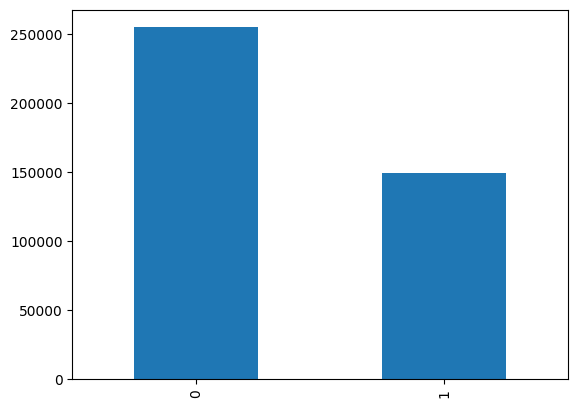

In [ ]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


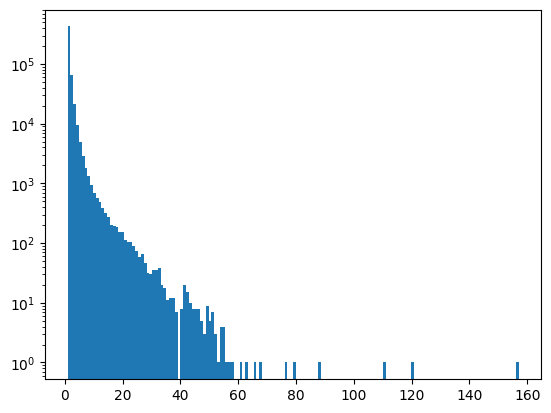

In [ ]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()